In [7]:
import os
import sys
import pickle

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from matplotlib.patches import Patch
import scipy

from matplotlib.lines import Line2D
import matplotlib as mpl
import pandas as pd
import seaborn as sns

In [8]:

# Get the current working directory
current_dir = os.getcwd()

# Navigate to 'network_simulations'
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

# Navigate to the sibling directory '00_opinion_function_setup'
sibling_dir = os.path.join(parent_dir, "00_opinion_function_setup")

# Add the sibling directory to sys.path for importing
if sibling_dir not in sys.path:
    sys.path.append(sibling_dir)

# Import the module from 00_opinion_function_setup
import opinion_functions as fun  # Replace this with the actual module name
import generate_homophilic_graph_symmetric

## Plotting parameters

In [9]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

linewidth=0.5

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors=['#19bdff','#f2d138'] #majority/minority colors
greycolor='#626262'
lightgreycolor='#c4c4c4'
myblack='#222222'

In [10]:
def customize_axes(ax,myblack):
    ax.spines['top'].set_color(myblack)
    ax.spines['bottom'].set_color(myblack)
    ax.spines['left'].set_color(myblack)
    ax.spines['right'].set_color(myblack)
    ax.xaxis.label.set_color(myblack)
    ax.yaxis.label.set_color(myblack)
    ax.title.set_color(myblack)
    ax.tick_params(axis='x', colors=myblack)
    ax.tick_params(axis='y', colors=myblack)

## Load data

In [12]:
# Parameters
output_folder = "input"  # Adjusted relative path
homophily_values = [0, 0.25, 0.5, 0.75, 1]
m_values = [2, 5]
num_agents_values = [1000]  # Use the correct number of agents
sim_number = 1000

# Load results
simulation_results = fun.load_simulation_results(output_folder, homophily_values, m_values, num_agents_values, sim_number)

Files in input folder:
homophily_0.25_m_2_num_agents_10000_sim_800_maj.pkl
homophily_0.25_m_2_num_agents_10000_sim_800_min.pkl
homophily_0.25_m_2_num_agents_10000_sim_900_maj.pkl
homophily_0.25_m_2_num_agents_10000_sim_900_min.pkl
homophily_0.25_m_2_num_agents_1000_sim_1000_maj.pkl
homophily_0.25_m_2_num_agents_1000_sim_1000_min.pkl
homophily_0.25_m_5_num_agents_10000_sim_800_maj.pkl
homophily_0.25_m_5_num_agents_10000_sim_800_min.pkl
homophily_0.25_m_5_num_agents_1000_sim_1000_maj.pkl
homophily_0.25_m_5_num_agents_1000_sim_1000_min.pkl
homophily_0.5_m_2_num_agents_10000_sim_800_maj.pkl
homophily_0.5_m_2_num_agents_10000_sim_800_min.pkl
homophily_0.5_m_2_num_agents_10000_sim_900_maj.pkl
homophily_0.5_m_2_num_agents_10000_sim_900_min.pkl
homophily_0.5_m_2_num_agents_1000_sim_1000_maj.pkl
homophily_0.5_m_2_num_agents_1000_sim_1000_min.pkl
homophily_0.5_m_5_num_agents_10000_sim_800_maj.pkl
homophily_0.5_m_5_num_agents_10000_sim_800_min.pkl
homophily_0.5_m_5_num_agents_1000_sim_1000_maj.pk

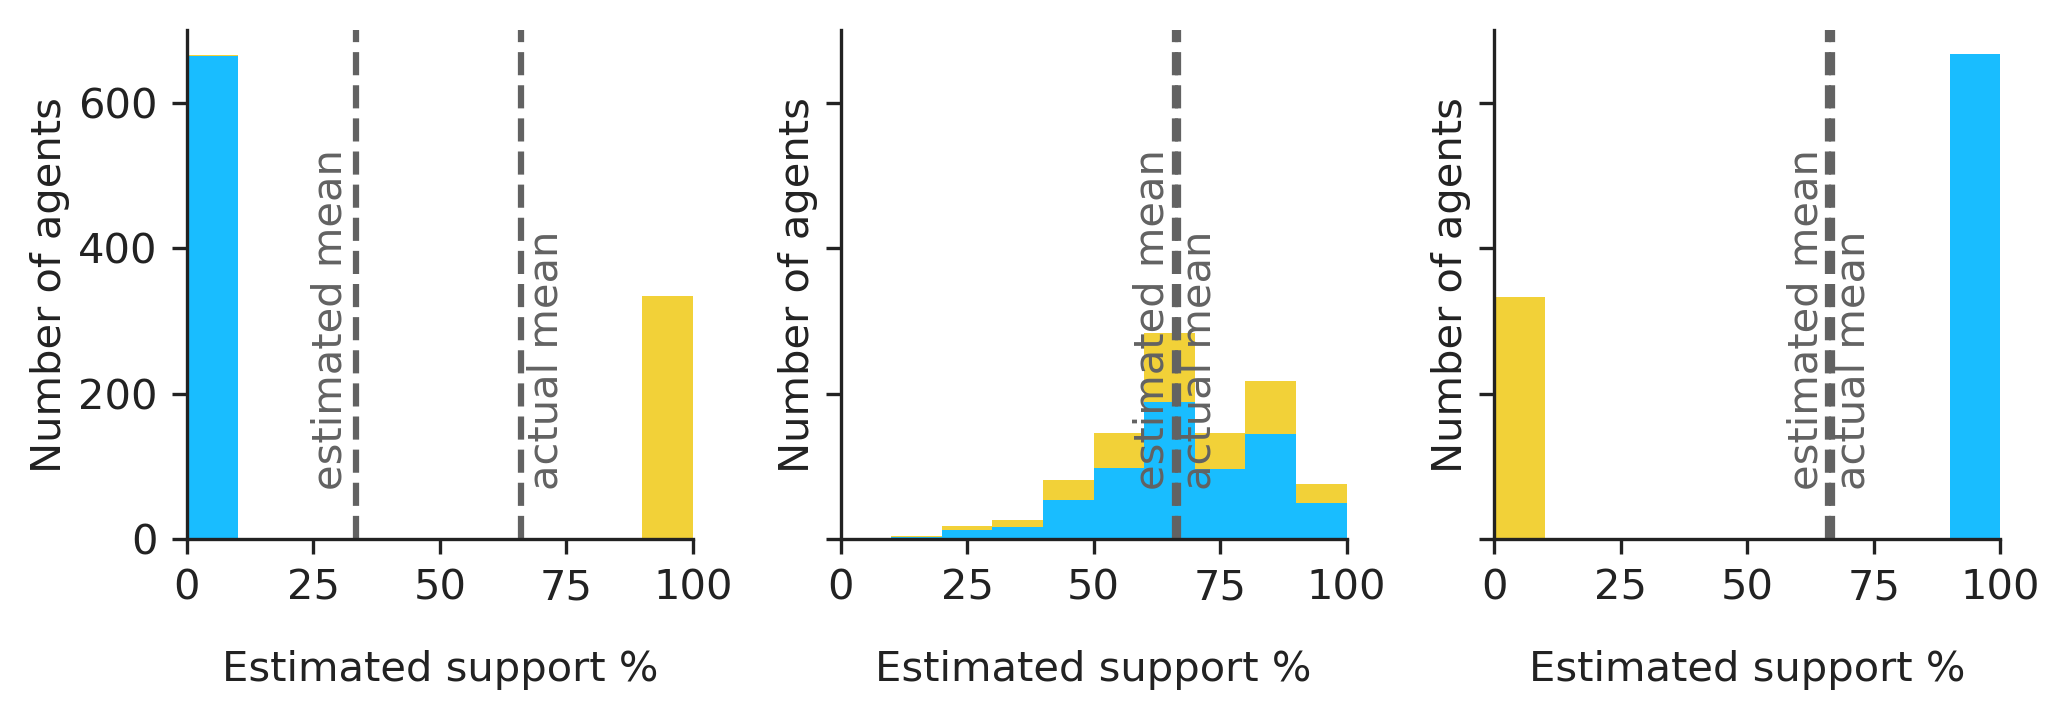

In [13]:

# Assuming `simulation_results` contains the loaded data
# Keyed by (homophily, m, num_agents), where m=2 and num_agents=1000
m = 5
num_agents = 1000
homophilyvec = [0, 0.5, 1]
minority_fraction = 0.333
majority_fraction = 1 - minority_fraction
num_sim = 1000  # Number of simulations
modelylim = 700
dpival = 300
# Create a grid of subplots
fig, axs = plt.subplots(1, 3, dpi=dpival, figsize=(7, 2.5), sharey=True)

for i, homophily in enumerate(homophilyvec):
    # Flatten the minority and majority arrays from the simulation results
    result_key = (homophily, m, num_agents)
    if result_key not in simulation_results:
        print(f"No data for homophily={homophily}, m={m}, num_agents={num_agents}")
        continue

    # Flatten the data
    majority_opinion = simulation_results[result_key]["majority"].flatten()
    minority_opinion = simulation_results[result_key]["minority"].flatten()

    # Create weights for scaling by num_sim
    majority_weights = np.ones_like(majority_opinion) / num_sim
    minority_weights = np.ones_like(minority_opinion) / num_sim

    # Create stacked histogram
    axs[i].hist([majority_opinion, minority_opinion], bins=10, histtype='bar', stacked=True,
                color=colors, weights=[majority_weights, minority_weights], density=False)

    # Label axes and customize plot
    axs[i].set_xlabel("Estimated support %", labelpad=10, size=SMALL_SIZE)
    axs[i].set_ylabel("Number of agents", labelpad=2, size=SMALL_SIZE)
    axs[i].axvline(x=66, color=greycolor, linestyle='--')
    axs[i].text(66 + 1, 80, 'actual mean', rotation=90, color=greycolor, size=SMALL_SIZE)
    mean_perceived = np.mean(np.concatenate([majority_opinion, minority_opinion]))
    axs[i].axvline(x=mean_perceived, color=greycolor, linestyle='--')
    axs[i].text(mean_perceived - 9, 80, 'estimated mean', rotation=90, color=greycolor, size=SMALL_SIZE)
    axs[i].set_xlim(0, 100)
    axs[i].set_ylim(0, modelylim )  # Rescale the y-axis to match scaled bar heights
    sns.despine(ax=axs[i])

    # Call customize_axes on each panel
    customize_axes(axs[i], myblack=myblack)

    # Optional: Add a title to each panel
    # axs[i].set_title(f"Homophily={homophily}", size=MEDIUM_SIZE)

# Adjust layout and display
plt.tight_layout()
# Uncomment below to save the figure
plt.savefig("../99_figures/homophily_example.pdf", format="pdf", bbox_inches="tight")
plt.show()